In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [10]:
path = '/Users/ianpile/Documents/GitHub/MTS_data_analysis/hw1/reverb_aggregated.csv'

In [11]:
df = pd.read_csv(path)

In [21]:
len('gdhsafjkd brahsdk'.split())

2

In [ ]:
lambda x: str(x)

In [ ]:
def f(x):
    return str(x)

In [24]:
df['description_length'] = df['description'].apply(lambda x: len(x.split()))

In [45]:
df = df.drop_duplicates().reset_index(drop = True)

In [31]:
import hashlib

In [40]:
def get_hash(x):
    return int(hashlib.md5(str(x).encode('utf-8')).hexdigest(),16)

In [49]:
get_hash(1)

261578874264819908609102035485573088411

In [47]:
df['bucket'] = df['listing_id'].apply(lambda x: get_hash(x)%100)

<Axes: >

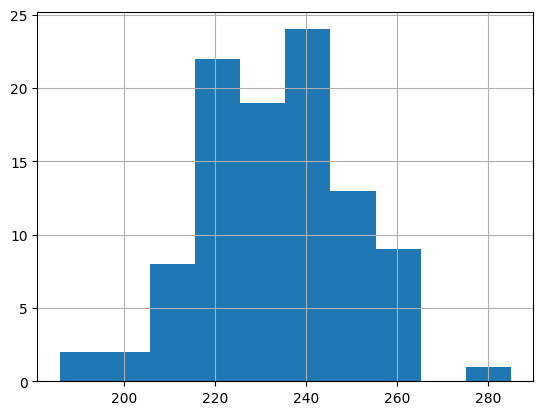

In [54]:
df.groupby('bucket')['listing_id'].count().reset_index().listing_id.hist()

In [60]:
df['description_length'].max()

65

In [61]:
df['description_length'].min()

1

In [64]:
df['bucket'] = df['listing_id'].apply(lambda x: get_hash(x)%50)

<Axes: >

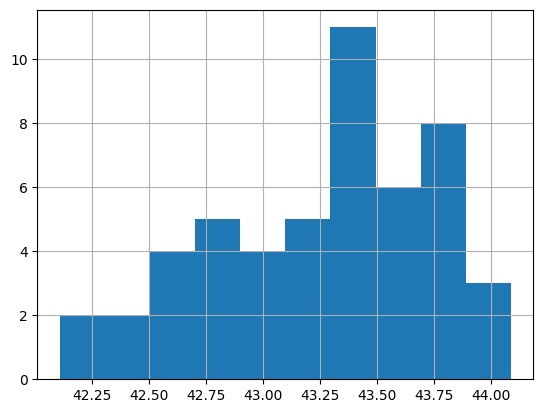

In [65]:
df.groupby('bucket')['description_length'].mean().reset_index().description_length.hist()

<Axes: >

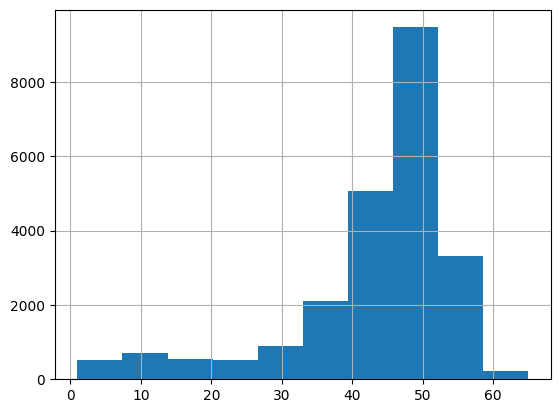

In [67]:
df.description_length.hist()

In [88]:
df['bucket'] = df['listing_id'].apply(lambda x: get_hash(x)%100)

In [70]:
import re

In [74]:
df.price[0]

'$1,131.92'

In [81]:
def get_price(x):
    return float(''.join(re.findall(r'[\d\.]+', x)))

In [82]:
df['price_norm'] = df.price.apply(get_price)

<Axes: >

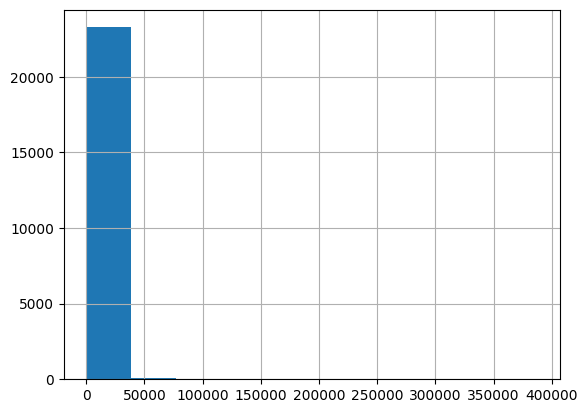

In [116]:
df.price_norm.hist()

In [90]:
df['bucket'] = df['listing_id'].apply(lambda x: get_hash(x)%40)

<Axes: >

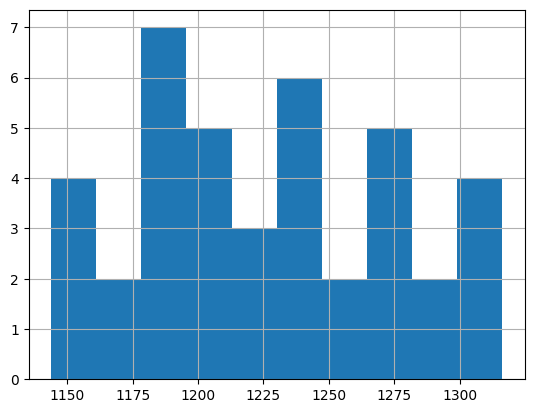

In [93]:
df[df.price_norm < 3000].groupby('bucket')['price_norm'].mean().reset_index().price_norm.hist()

In [96]:
prices = df[df.price_norm < 3000].price_norm.to_numpy()

In [105]:
len(prices)

17391

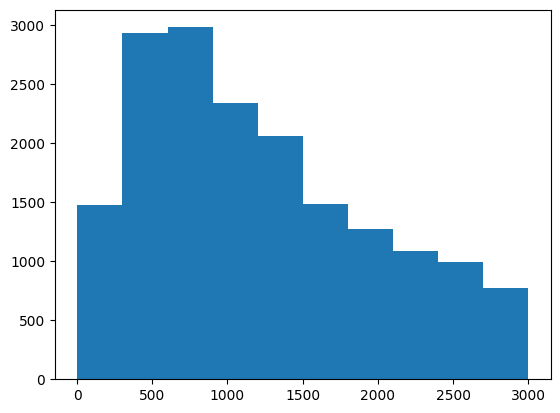

In [99]:
_ = plt.hist(prices)

In [114]:
x = np.random.choice(prices, size=(1000,10000), replace = True)

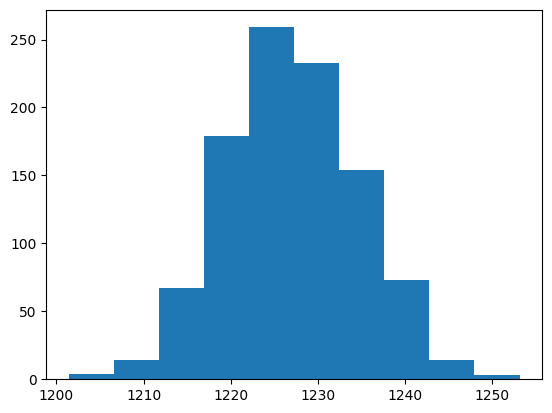

In [115]:
_ = plt.hist(x.mean(axis = 1))

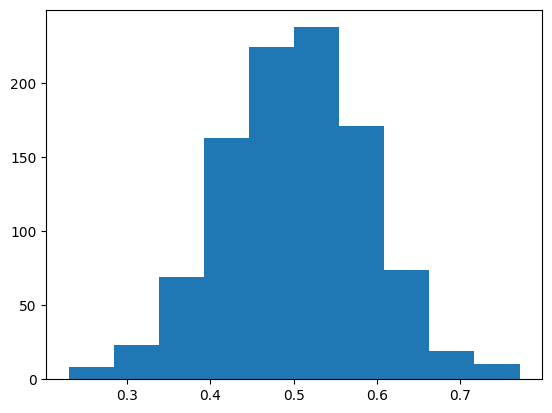

In [111]:
_ = plt.hist(np.random.uniform(size = (1000, 10)).mean(axis = 1))

# Про свойства нормального распределения

In [118]:
x = np.random.normal(1, 2, size = 1000)

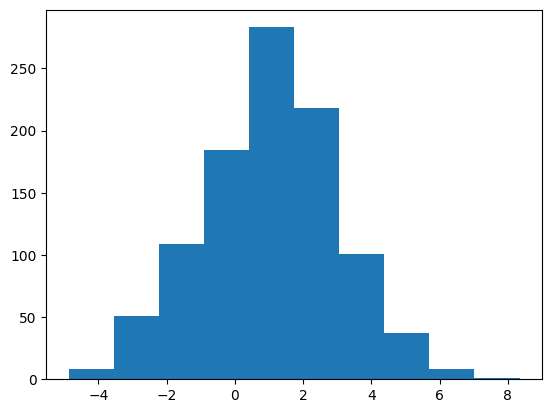

In [119]:
_ = plt.hist(x)

In [120]:
def st_normal(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

In [122]:
import scipy

In [124]:
scipy.integrate.quad(st_normal, -1.96, 1.96)

(0.9500042097035591, 1.0474096492701335e-11)

In [125]:
x = np.random.normal(1, 3, size = 10000)
y = np.random.normal(2, 4, size = 10000)

In [126]:
(x+y).mean()

3.026590961948424

In [127]:
(x+y).std()

4.981296328047744

In [128]:
s = np.random.normal(1, 4, size = 10000)

In [130]:
((s-1)/4).std()

0.9919359203753826

# Доверительный интервал для среднего

$mean(x) \pm quantile* S/\sqrt n $

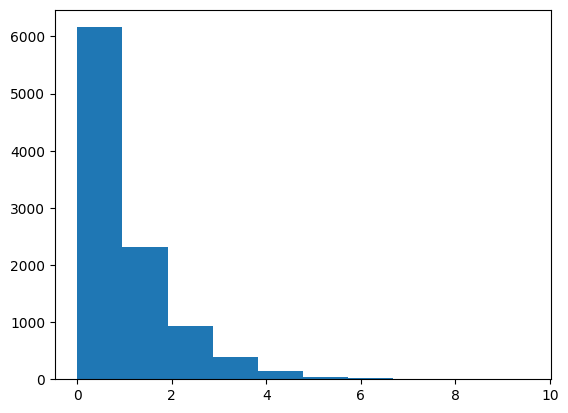

In [132]:
_ = plt.hist(np.random.exponential(size = 10000))

In [138]:
np.random.exponential??

In [5]:
n = 100000
s = np.random.exponential(size = n)

std = s.std()
mean = s.mean()

print(mean - 1.96*std/np.sqrt(n), 
      mean + 1.96*std/np.sqrt(n))

0.9892135919853561 1.0015239511012755


In [3]:
samples = np.random.exponential(size = (1000, n))

In [13]:
np.quantile??

In [14]:
np.quantile(np.random.choice(s, size = (1000,n), replace = True).mean(axis = 1),
            [0.025, 0.975]
           )

array([0.98906733, 1.00170943])